In [1]:
import Integration
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline
import numpy as np
from pandas import DataFrame, Series
import pandas as pd

# <center>Adaptive Quadrature</center>
## <center>Kenneth Potts</center>
### <center>Numerical Analysis - Ithaca College</center>
### <center>December 2, 2016</center>

## <font color="blue">Introduction</font>
### Numerical Integration
$$\displaystyle\int_{a}^{b}f(x)dx$$
Why do we approximate integrals? 
- Finding an antiderivative can be difficult or even impossible because one may not exist.
- We wish to program a computer to compute an integral for us, in which case we most likely need a numerical algorithm

## <font color="blue">Standard Quadrature</font>
First, some very familiar concepts so we will move quickly.
### The Trapezoidal Rule
$$\displaystyle\int_{a}^{b}f(x)dx \approx \frac{h}{2}\left(f(a)+f(b)\right)$$
where $n$ is the number of subsections between nodes and h is the length of the section between the nodes:
$$h = \frac{(b-a)}{n}=\frac{b-a}{1}$$

The Composite Trapezoidal rule uses evenly spaced nodes to approximate an integral.
$$\displaystyle\int_a^b f(x)dx = \frac{h}{2}[f(a) + 2\sum_{i=1}^{n-1}f(a + i\cdot h) + f(b)] + E_{t}(x)$$
where $E_{t}(x)$ is the error of the trapezoidal rule approximation:
$$E_{t}(x) = \frac{(b-a)h^2}{12}f^{''}(\xi_{t})$$

### The Trapezoidal Rule Error
$$E_{t}(x) = \frac{(b-a)h^2}{12}f^{''}(\xi_{t})$$

As we increase the number of nodes, $h$ will decrease. The error is a function of $h$ and decreases by a factor of $O(h^2)$

Assume a constant $\xi$ and we get the error for $n$ subsections is:
$$e_{n} \approx Mh^2\\$$
$$e_{2n} \approx M(\frac{h}{2})^2\\$$
$$\implies \frac{e_{n}}{e_{2n}}\approx \frac{Mh^2}{M(\frac{h}{2})^2} = 4\\$$
$$\implies e_{n} \approx 4e_{2n}$$

When we double the subsetions, we get $\frac{1}{4}$ the error!

### The Composite Simpson's Rule
$$\int_a^b f(x)dx = \frac{h}{3}[f(a) + 2\sum_{i=0}^{\frac{n}{2}}f(a + (2i-2)\cdot h) + 4\sum_{i=0}^{\frac{n}{2}}f(a + (2i-1)\cdot h) + f(b)] + E_{s}(x)$$
where $n$ is the number of subsections between nodes and h is the length of the section between the nodes:
$$h = \frac{(b-a)}{n}$$

The Composite Simpson's rule uses evenly spaced nodes to approximate an integral.

$E_{t}(x)$ is the error of the trapezoidal rule approximation:
$$E_{s}(x) = \frac{h^4}{180}f^{[4]}(\xi_{s})$$

### The Composite Simpson's Rule Error

By the same process of the trapezoidal rule we get:
$$e_{n} \approx 16e_{2n}$$

## An Adaptive Algorithm

Standard Quadrature methods use evenly spaced nodes no matter how the function acts. If we are to compute an integral approximation we may be doing many iterations to achieve a sufficiently small bound on the error.
- Only place nodes where necessary
    - Where the function is varying greatly
- Break the function into smaller and smaller sections
    - stop when a sufficient error bound is reached
- Recursive algorithm
- Allows for **parallelization**

### <font color="blue">Pseudocode:</font>

**Assumptions**: $f''(x)$ is continuous on the interval $[a,b]$

**Inputs**: A function $f$, the interval $[a,b]$ over which to integrate, and a set tolerance level $tol$

**Step 1**: Set $m=\frac{a+b}{2}$, then find integral estimates
$I_{1}$ and $I_{2}$

**Step 2**: If $| I_{2}-I_{1} | < $<font color="red">C</font>$\cdot tol$ then return $I_{2}$

**Step 3**: Do steps 1-5 with inputs $f$; $[a,\frac{a+b}{2}]$; and $\frac{tol}{2}$, and set A equal to the result

**Step 4**: Do steps 1-5 with inputs $f$; $[\frac{a+b}{2},b];$ and $\frac{tol}{2}$, and set B equal to the result

**Step 5**: Return $A+B$

**Output**: Approximate value of the integral $\int_{a}^{b}f(x)dx$

<font color="red">C</font> depends on the method being used.

### Utilizing The Error Relationship

$$\int_{a}^{b}f(x)dx = I_{2} + e_{2} = I_{1} + e_{1}$$

Where $I_2$ is an approximate for which $h$ is half that of the $h$ value used in $I_1$. We can then use the trapezoidal rule error relationship $e_{n} \approx 4e_{2n}$ for a substitution:
$$I_{2}-I_{1} = e_{1} - e_{2}$$
$$I_{2}-I_{1} \approx 4e_{2} - e_{2}$$
$$I_{2}-I_{1} \approx 3e_{2}$$

The Value of <font color="red">C</font> for the trapezoidal rule is 3, and by the same math, <font color="red">C</font> $ = 15$ for the composite Simpson's rule.

## Code Implementation
We wish to approximate the following integral:

$\displaystyle\int_{-1}^{3}x\cdot sin(x^2)dx$

We will start with a error tolerance of $10^{-4}$

In [2]:
# Simple Python Implementation
# using the composite trapezoidal rule

def simpleAdaptQuad(func,a,b,tol):
    m = (a+b)/2      #midpoint
    h_1 = b-a           #interval size for aprox I_1
    h_2 = (b-a)/2       #interval size for aprox I_2

    f_a = func(a) #f(a)
    f_b = func(b) #f(b)
    f_m = func(m) #f(m)

    I_1 = (h_1/2)*(f_a+f_b) # approximation I_1
    I_2 = (h_2/2)*(f_a+(2*f_m)+f_b) # approx I_2
    max_error = np.abs(I_2-I_1)/3 #upper bound on error for trapezoidal

    if max_error < (tol):
        return I_2, max_error
    else:  #recursive call on left and right halves
        I_left, left_error = simpleAdaptQuad(func, a, (a+b)/2, tol/2)
        I_right, right_error = simpleAdaptQuad(func, (a+b)/2, b, tol/2)

    return I_left + I_right, left_error + right_error
    # returns: sum of left and right aprox 
    # sum of left and right error

### Run The Algorithm

We can use this algorithm to approximate
$$\int_{-1}^{3}x\cdot sin(x^2)dx$$

In [3]:
# we can call the function simpleAdaptQuad
approx, error = simpleAdaptQuad(lambda x: np.sin(x**2)*x, -2, 5, 1e-4)
print("Approximation = %s, Error = %s" % (approx, error))

Approximation = -0.822420173744, Error = 5.57562020772e-05


Let's approximate $\displaystyle\int_{-8}^{-2}\left(-x^3+2x^2-x+13\right)dx$

In [4]:
# we can call the function simpleAdaptQuad
approx, error = simpleAdaptQuad(lambda x: -np.power(x,3)+2*np.power(x,2)-x+13, -8, -2, 1e-5)
print("Approximation = %s, Error = %s" % (approx, error))

Approximation = 1464.00000545, Error = 5.44732389596e-06


## How does adaptive quadrature compare?
I have created a simple integration library that can be used to answer this question.

Let's compare the node placement for the standard Simpson's rule and the adaptive simpson's rule for the integral
$$\int_{1}^{4}x\cdot sin(2x)dx$$

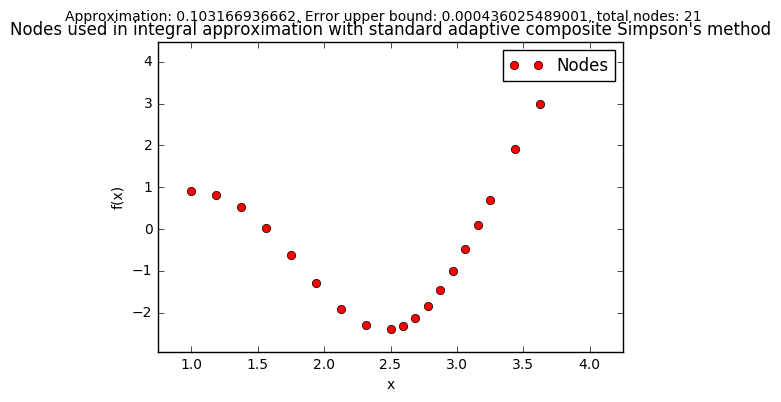

In [2]:
# my integration library
import Integration

result = Integration.quad(lambda x: x*np.sin(2*x), 1, 4, tol=1e-3,method='SIMPSON', visual_mode=True),



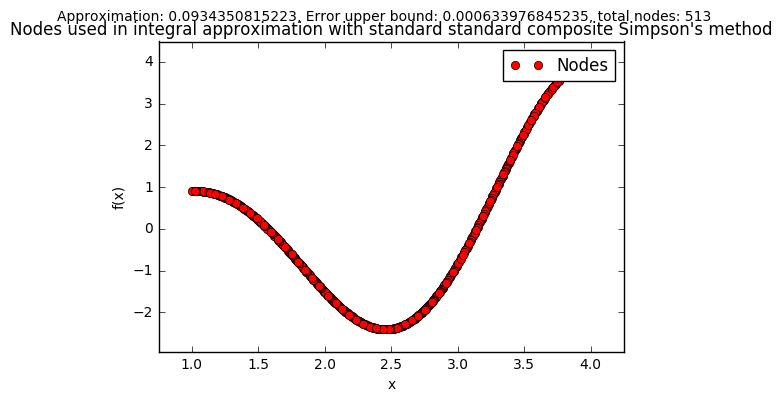

In [3]:
result = Integration.quad(lambda x: x*np.sin(2*x), 1, 4, tol=1e-3,method='SIMPSON', adaptive=False, double_nodes=True, visual_mode=True),

## Let's Compare Methods

We will use the function $\displaystyle \int_{-1}^{3}xsin(2x)dx$ to make a comparison.
In my Integration libary I have created

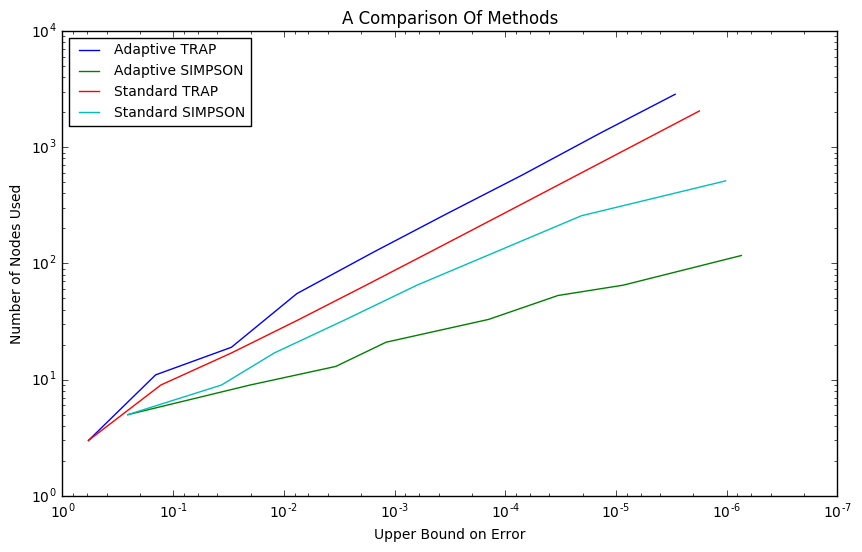

In [8]:
nodes, errors = Integration.quad_comparison(lambda x: np.sin(x * 2) * x, -1, 3, num_tests=10, visual_mode=True)

### Another Coparison

We will now use the function $\displaystyle\int_{1}^{3} \frac{sin(x^{2})}{x}$

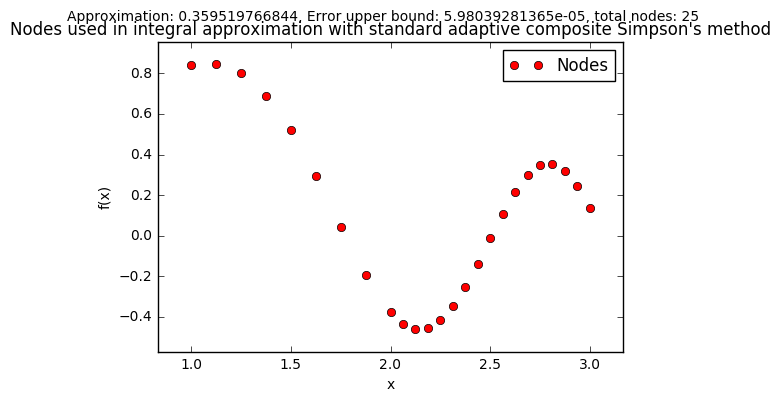

In [22]:
result = Integration.quad(lambda x: np.sin(np.power(x,2))/x, 1, 3 , tol=1e-4, method='SIMPSON', visual_mode=True)

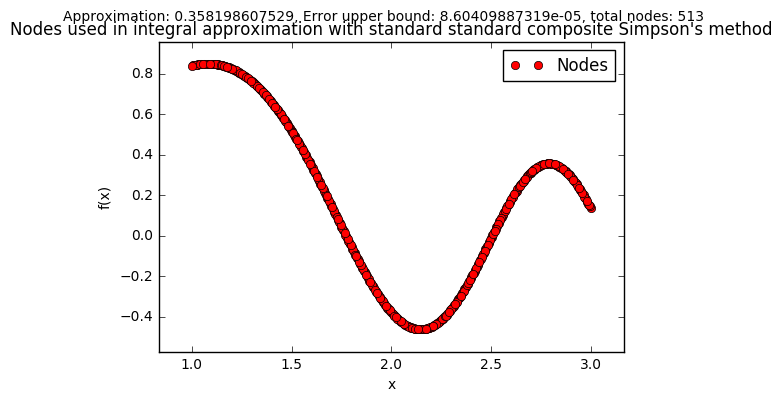

In [23]:
result = Integration.quad(lambda x: np.sin(np.power(x,2))/x, 1, 3 , tol=1e-4, method='SIMPSON', adaptive=False ,visual_mode=True)

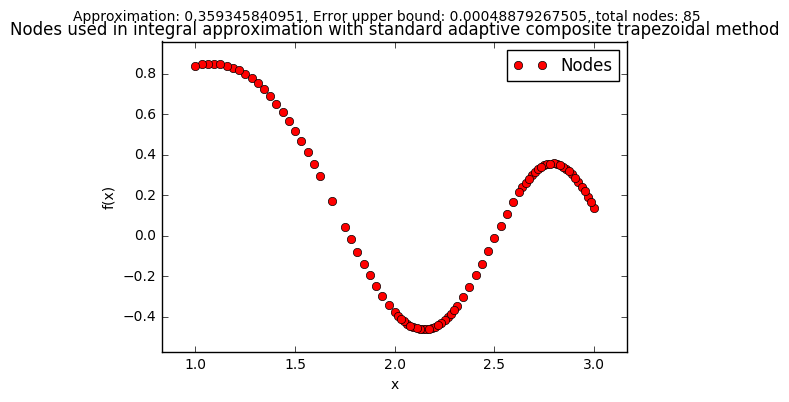

In [24]:
result = Integration.quad(lambda x: np.sin(np.power(x,2))/x, 1, 3, tol=1e-3 ,method='TRAP', visual_mode=True)

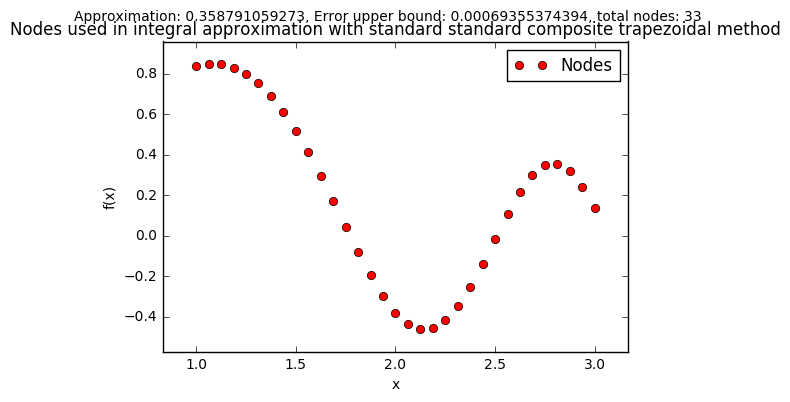

In [26]:
result = Integration.quad(lambda x: np.sin(np.power(x,2))/x, 1, 3, tol=1e-3 ,method='TRAP', adaptive=False, visual_mode=True)

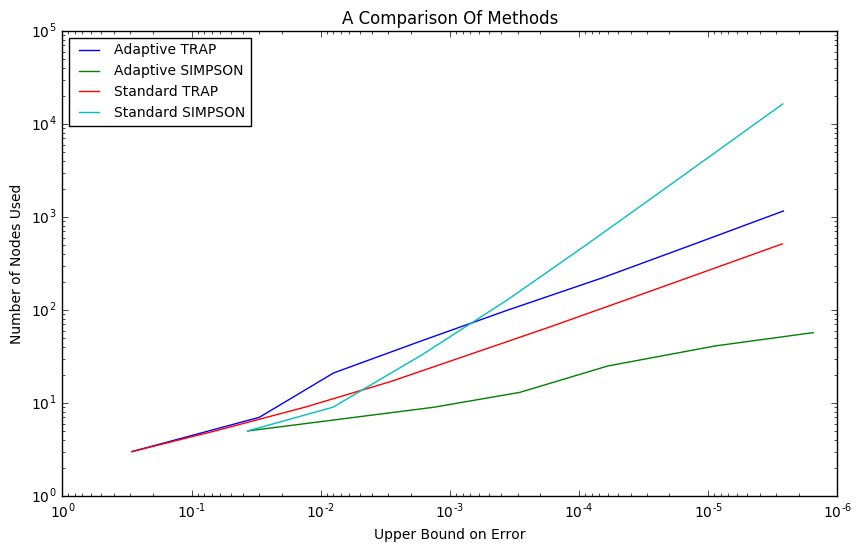

In [41]:
nodes, errors = Integration.quad_comparison(lambda x: np.sin(np.power(x,2))/x, 1, 3, num_tests=10, visual_mode=True)

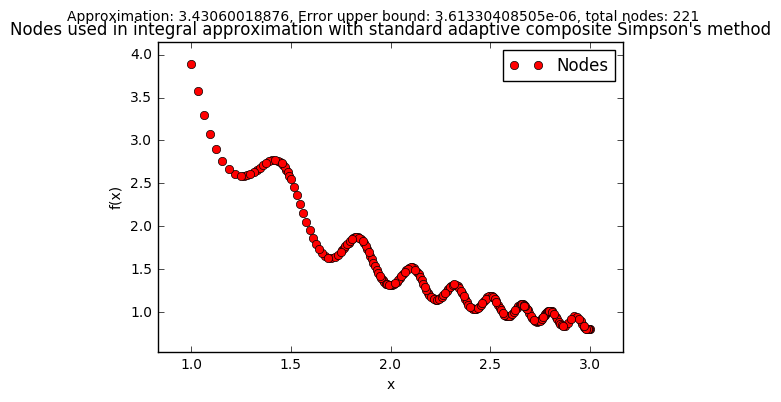

In [43]:
result = Integration.quad(lambda x: np.exp(np.cos(np.sin(np.power(x,3)))/x)*2/x, 1, 3, tol=1e-5 ,method='SIMPSON', adaptive=True, visual_mode=True)

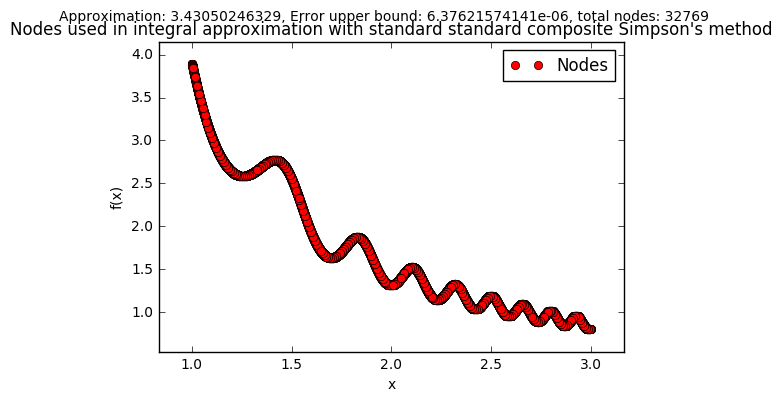

In [42]:
result = Integration.quad(lambda x: np.exp(np.cos(np.sin(np.power(x,3)))/x)*2/x, 1, 3, tol=1e-5 ,method='SIMPSON', adaptive=False, visual_mode=True)

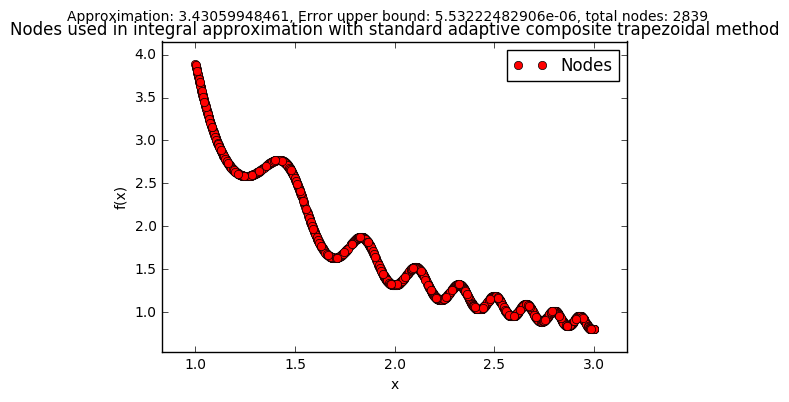

In [44]:
result = Integration.quad(lambda x: np.exp(np.cos(np.sin(np.power(x,3)))/x)*2/x, 1, 3, tol=1e-5 ,method='TRAP', adaptive=True, visual_mode=True)

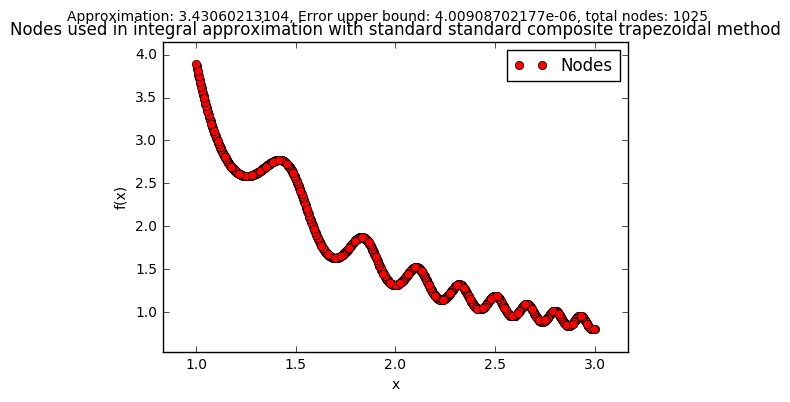

In [43]:
result = Integration.quad(lambda x: np.exp(np.cos(np.sin(np.power(x,3)))/x)*2/x, 1, 3, tol=1e-5 ,method='TRAP', adaptive=False, visual_mode=True)

### Then the comparison:

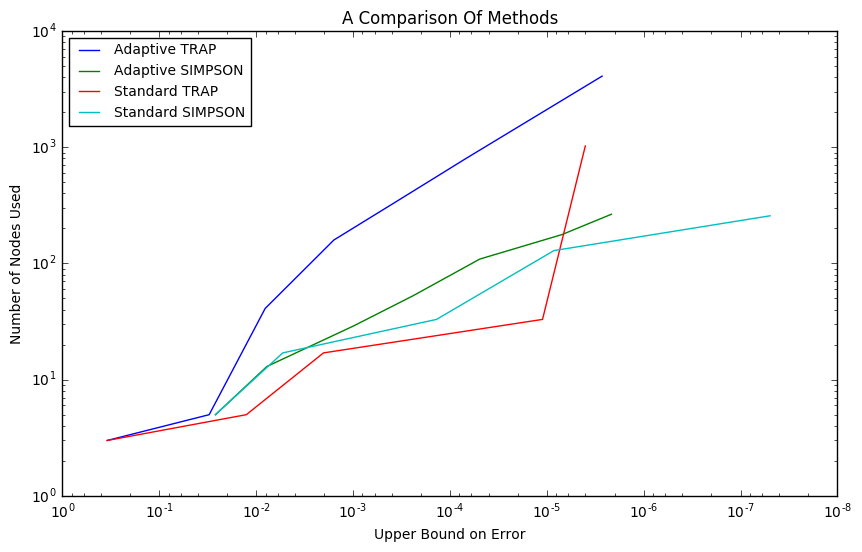

In [2]:
nodes, errors = Integration.quad_comparison(lambda x: np.exp(np.cos(np.sin(np.power(x,3)))/x)*2/x, 1, 3,num_tests=10, visual_mode=True)

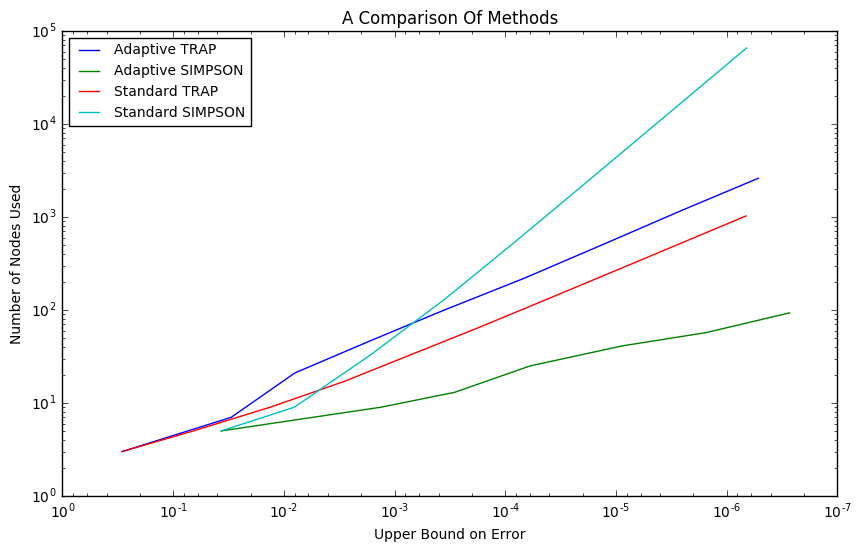

In [46]:
nodes, errors = Integration.quad_comparison(lambda x: np.sin(np.power(x,2))/x, 1, 3, visual_mode=True)

## Conclusion
Adaptive Quadrature is an algorithm that:
- is computationally more efficient algorithm
- utilizes recursion or more efficient data structures
- can utilize parallelization
- can integrate poor behaving integrands

## Time permitting, we will integrate a function from the audience!

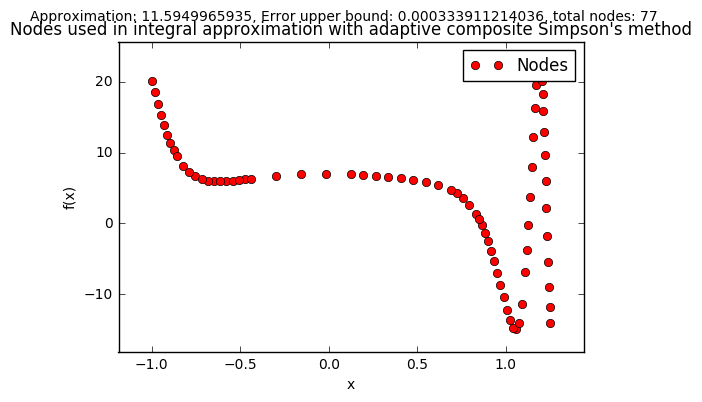

In [3]:
result = Integration.quad(lambda x: -19*np.sin(x**9)+2*np.cos(x*2)+5, -1, 5/4, tol=1e-3, method='SIMPSON', adaptive=True,visual_mode=True)

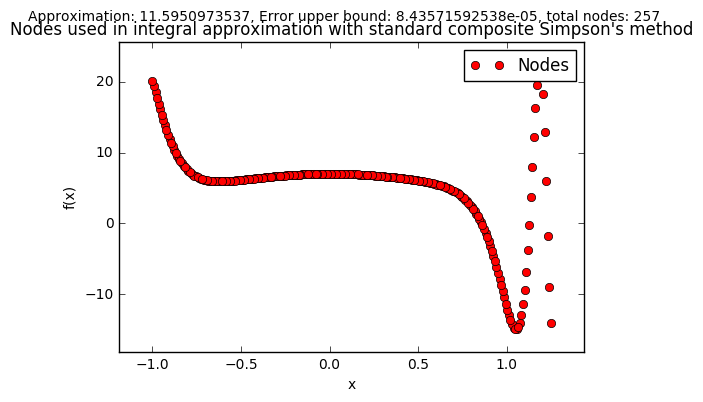

In [4]:
result = Integration.quad(lambda x: -19*np.sin(x**9)+2*np.cos(x*2)+5, -1, 5/4, tol=1e-3, method='SIMPSON', adaptive=False, visual_mode=True)

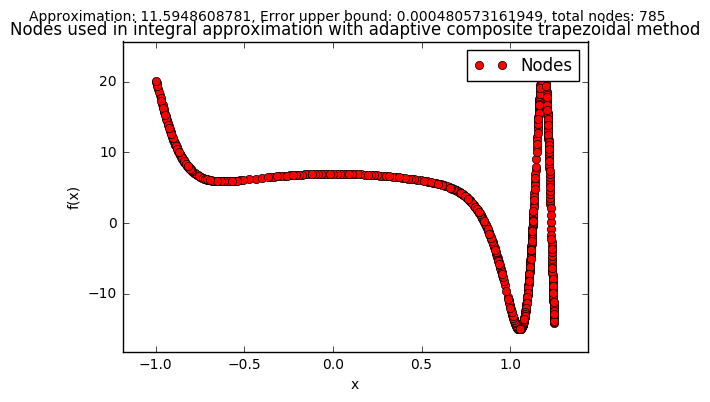

In [5]:
result = Integration.quad(lambda x: -19*np.sin(x**9)+2*np.cos(x*2)+5, -1, 5/4, tol=1e-3, method='TRAP', adaptive=True,visual_mode=True)

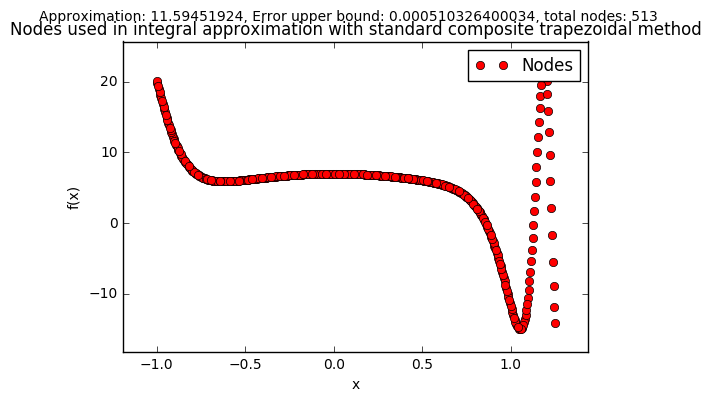

In [6]:
result = Integration.quad(lambda x: -19*np.sin(x**9)+2*np.cos(x*2)+5, -1, 5/4, tol=1e-3, method='TRAP', adaptive=False,visual_mode=True)

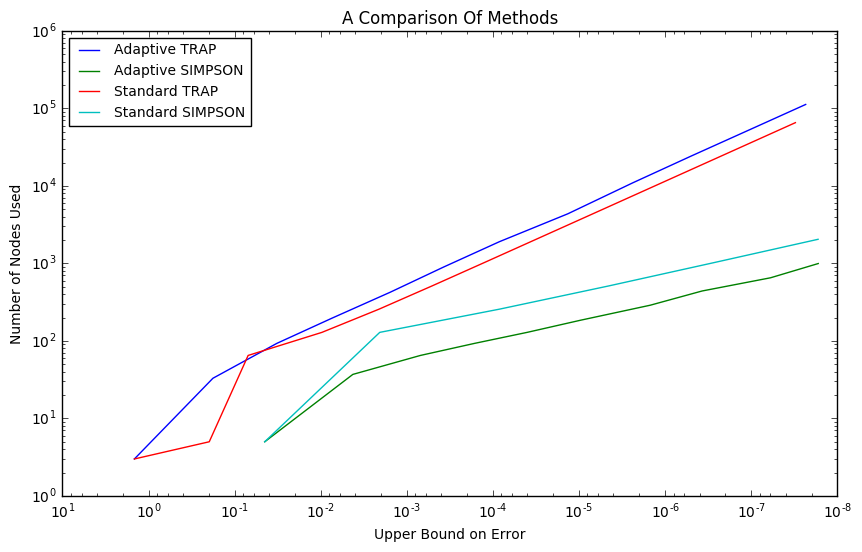

In [9]:
nodes, errors = Integration.quad_comparison(lambda x: -19*np.sin(x**9)+2*np.cos(x*2)+5, -1, 5/4,num_tests=13, visual_mode=True)

In [52]:
nodes, errors = Integration.quad_comparison(lambda x: -19*(np.exp(x**9)/np.sin(x))+2*np.cos(x*2)+5, -1, 5/4, num_tests=5, visual_mode=True)

KeyboardInterrupt: 

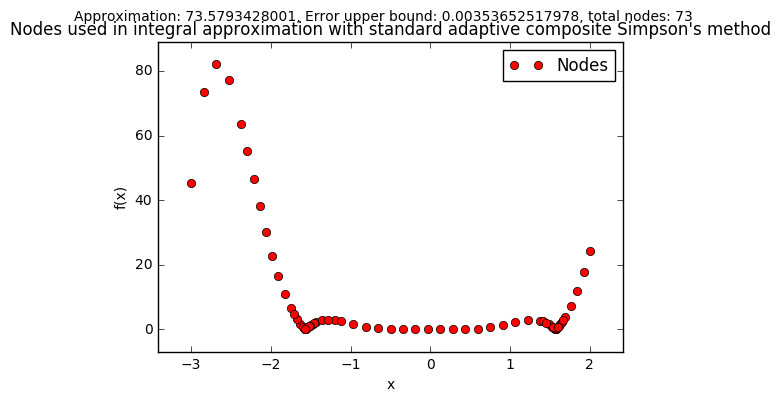

In [51]:
result = Integration.quad(lambda x: 2*np.power(x,4)*np.abs(np.sin(x*2)), -3, 2, tol=1e-2, method='SIMPSON', adaptive=True,visual_mode=True)

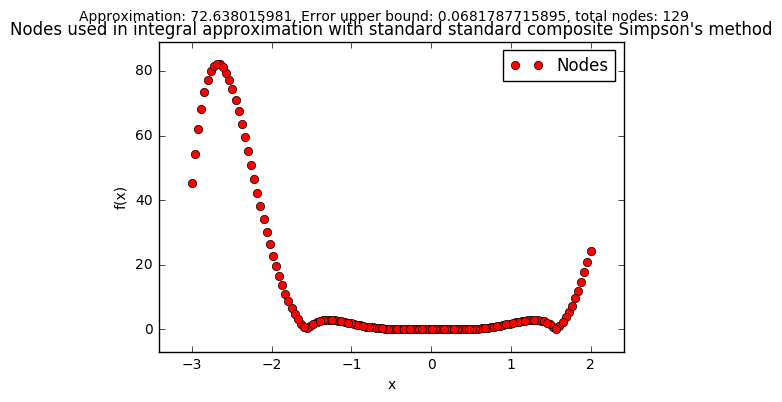

In [54]:
result = Integration.quad(lambda x: 2*np.power(x,4)*np.abs(np.sin(x*2)), -3, 2, tol=1e-1, method='SIMPSON', adaptive=False,visual_mode=True)

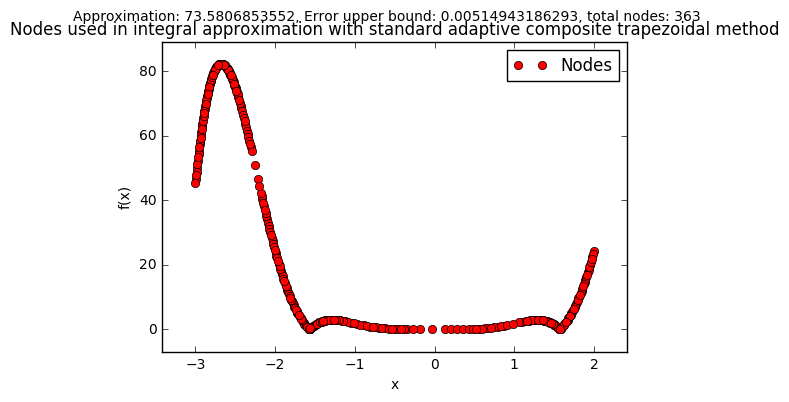

In [37]:
result = Integration.quad(lambda x: 2*np.power(x,4)*np.abs(np.sin(x*2)), -3, 2, tol=1e-2, method='TRAP', adaptive=True,visual_mode=True)

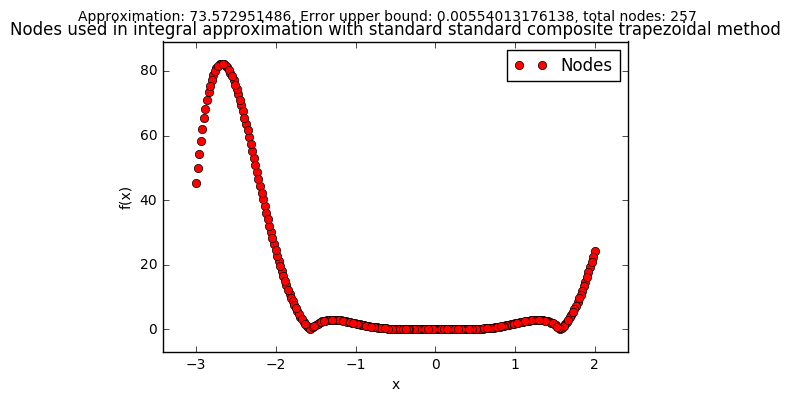

In [36]:
result = Integration.quad(lambda x: 2*np.power(x,4)*np.abs(np.sin(x*2)), -3, 2, tol=1e-2, method='TRAP', adaptive=False,visual_mode=True)

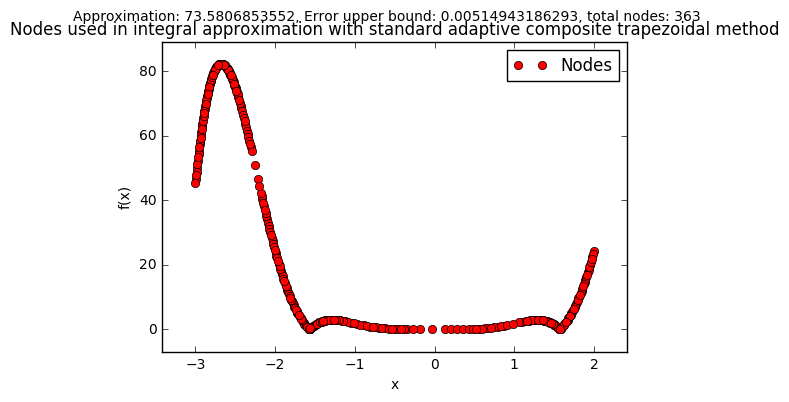

In [53]:
result = Integration.quad(lambda x: 2*np.power(x,4)*np.abs(np.sin(x*2)), -3, 2, tol=1e-2, method='TRAP', adaptive=True,visual_mode=True)

In [ ]:
2*np.power(x,4)*np.abs(np.sin(x*2))
